# Model Stats

In [35]:
#import os
#import pickle

import pandas as pd
import numpy as np
#import kagglehub
import matplotlib.pyplot as plt

import keras
#from keras import layers, ops

from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report

In [5]:
# This is the code used to load ALL images (over 12,000)
dir_path = '../../../../DataSci/datasets/kidneys/images'

train_df, val_df = keras.utils.image_dataset_from_directory(
    dir_path,
    #labels = labels,
    validation_split = 0.2,
    subset = 'both',
    seed = 172372,
    image_size = (1250, 1250), # image size
    pad_to_aspect_ratio = True, # want same image size, but maintain aspect ratio by padding out images
    batch_size = 128,
    color_mode= 'grayscale'
)

Found 12446 files belonging to 4 classes.
Using 9957 files for training.
Using 2489 files for validation.


## Model 1

In [3]:
mod1 = keras.models.load_model('model_1_checkpoints/06.keras')

In [6]:
preds1 = mod1.predict(val_df)

20/20 ━━━━━━━━━━━━━━━━━━━━ 190s 9s/step


In [7]:
val_y_pred1 = np.argmax(preds1, axis=1)

In [8]:
val_y_true = np.concatenate([y for im, y in val_df])

2025-08-14 17:43:40.310785: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


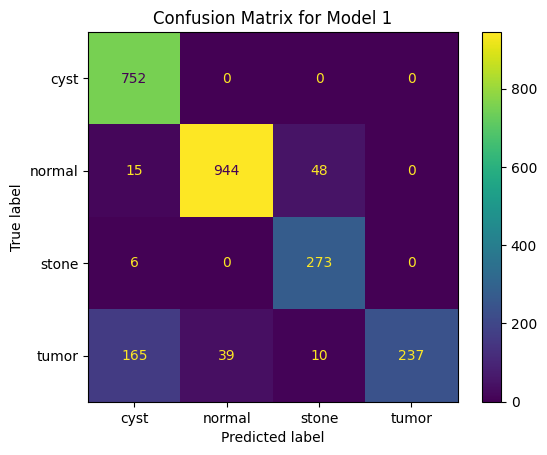

In [9]:
fig, ax = plt.subplots()

ConfusionMatrixDisplay.from_predictions(val_y_true, val_y_pred1, display_labels=['cyst', 'normal', 'stone', 'tumor'], ax=ax)
ax.set_title('Confusion Matrix for Model 1');

fig.savefig('../images/confusionmatrix_model1.png')

In [47]:
def report_scores(y_true, y_pred, model_label):
    print(model_label)
    print()
    print(f"Accuracy score: {accuracy_score(y_true, y_pred)}\n")
    print('Classification report:')
    print(classification_report(y_true, y_pred, target_names=['cyst', 'normal', 'stone', 'tumor'], digits=3))
    #print(f"\nGlobal F1-score: {f1_score(y_true, y_pred, average='micro')}\n")
    #f1each=f1_score(val_y_true, val_y_pred1, average=None, labels=[0,1,2,3])
    #print(f"Cyst F1-score: {f1each[0]}\n")
    #print(f"Normal F1-score: {f1each[1]}\n")
    #print(f"Stone F1-score: {f1each[2]}\n")
    #print(f"Tumor F1-score: {f1each[3]}\n")

In [48]:
report_scores(val_y_true, val_y_pred1, 'Model 1')

Model 1

Accuracy score: 0.8862997187625552

Classification report:
              precision    recall  f1-score   support

        cyst      0.802     1.000     0.890       752
      normal      0.960     0.937     0.949      1007
       stone      0.825     0.978     0.895       279
       tumor      1.000     0.525     0.689       451

    accuracy                          0.886      2489
   macro avg      0.897     0.860     0.856      2489
weighted avg      0.904     0.886     0.878      2489



In [53]:
history1 = pd.DataFrame([
    {'epoch': 1, 'loss': 1.5161, 'sparse_categorical_accuracy': 0.5178},
    {'epoch': 2, 'loss': 0.4045, 'sparse_categorical_accuracy': 0.8466, 'val_loss': 0.2119, 'val_sparse_categorical_accuracy': 0.9405},
    {'epoch': 3, 'loss': 0.1594, 'sparse_categorical_accuracy': 0.9518},
    {'epoch': 4, 'loss': 0.0785, 'sparse_categorical_accuracy': 0.9748, 'val_loss': 0.0478, 'val_sparse_categorical_accuracy': 0.9847},
    {'epoch': 5, 'loss': 0.0615, 'sparse_categorical_accuracy': 0.9783},
    {'epoch': 6, 'loss': 0.0264, 'sparse_categorical_accuracy': 0.9935, 'val_loss': 0.5254, 'val_sparse_categorical_accuracy': 0.8863},
    {'epoch': 7, 'loss': 0.5398, 'sparse_categorical_accuracy': 0.8668},
    {'epoch': 8, 'loss': 0.0199, 'sparse_categorical_accuracy': 0.9969, 'val_loss': 0.110, 'val_sparse_categorical_accuracy': 0.9984},
    {'epoch': 9, 'loss': 0.0065, 'sparse_categorical_accuracy': 0.9997},
    {'epoch': 10, 'loss': 0.0036, 'sparse_categorical_accuracy': 0.9999, 'val_loss': 0.0036, 'val_sparse_categorical_accuracy': 0.9996},
    {'epoch': 11, 'loss': 0.0017, 'sparse_categorical_accuracy': 1.0000},
    {'epoch': 12, 'loss': 0.0011, 'sparse_categorical_accuracy': 1.0000, 'val_loss': 0.0026, 'val_sparse_categorical_accuracy': 0.9996},
    {'epoch': 13, 'loss': 0.000753, 'sparse_categorical_accuracy': 1.0000},
    {'epoch': 14, 'loss': 0.000525, 'sparse_categorical_accuracy': 1.0000, 'val_loss': 0.0022, 'val_sparse_categorical_accuracy': 0.9996},
    {'epoch': 15, 'loss': 0.000421, 'sparse_categorical_accuracy': 1.0000},
    {'epoch': 16, 'loss': 0.000310, 'sparse_categorical_accuracy': 1.0000, 'val_loss': 0.0018, 'val_sparse_categorical_accuracy': 0.9996},
    {'epoch': 17, 'loss': 0.000238, 'sparse_categorical_accuracy': 1.0000},
    {'epoch': 18, 'loss': 0.000201, 'sparse_categorical_accuracy': 1.0000, 'val_loss': 0.0021, 'val_sparse_categorical_accuracy': 0.9992}
])

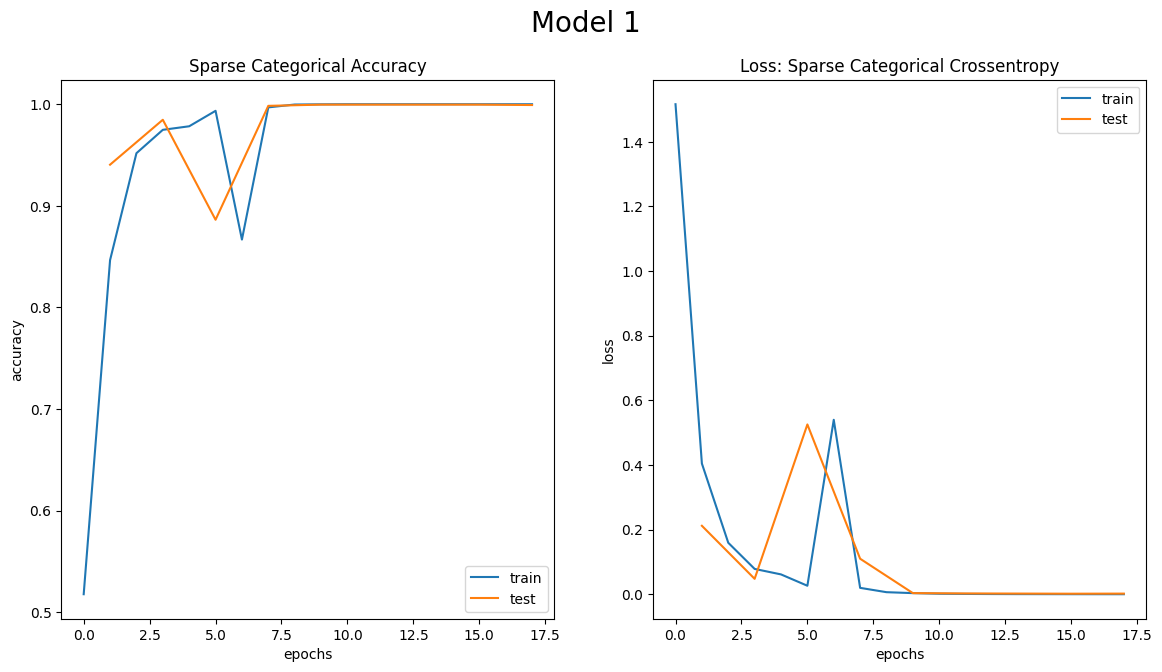

In [56]:
# how did the training process go?
fig, axes = plt.subplots(1,2, figsize=(14,7))

fig.suptitle('Model 1', fontsize = 20)
ax = axes[0]
ax.plot(history1['sparse_categorical_accuracy'], label='train')
ax.plot(history1['val_sparse_categorical_accuracy'].dropna(), label='test')

ax.set_title('Sparse Categorical Accuracy')
ax.set_xlabel('epochs')
ax.set_ylabel('accuracy')
ax.legend()

ax = axes[1]
ax.plot(history1['loss'], label='train')
ax.plot(history1['val_loss'].dropna(), label='test')
ax.set_title('Loss: Sparse Categorical Crossentropy')
ax.set_xlabel('epochs')
ax.set_ylabel('loss')
ax.legend();

plt.savefig('../images/model1.jpg')

## Model 2: More layers

In [36]:
mod2 = keras.models.load_model('model_2_checkpoints/01.keras')

In [37]:
preds2 = mod2.predict(val_df)

20/20 ━━━━━━━━━━━━━━━━━━━━ 180s 9s/step


In [38]:
val_y_pred2 = np.argmax(preds2, axis=1)

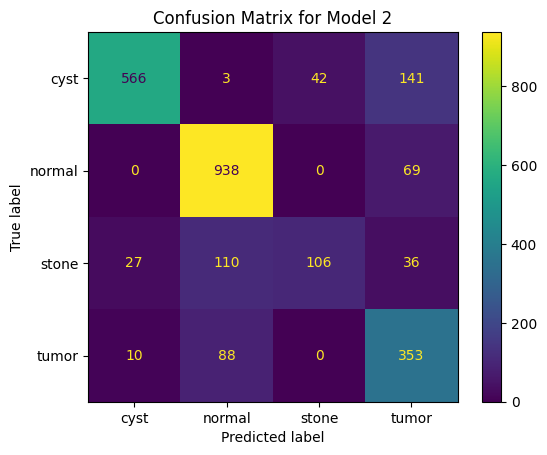

In [39]:
fig, ax = plt.subplots()

ConfusionMatrixDisplay.from_predictions(val_y_true, val_y_pred2, display_labels=['cyst', 'normal', 'stone', 'tumor'], ax=ax)
ax.set_title('Confusion Matrix for Model 2');

# fig.savefig('../images/confusionmatrix_model2.png')

In [49]:
report_scores(val_y_true, val_y_pred2, 'Model 2')

Model 2

Accuracy score: 0.7886701486540779

Classification report:
              precision    recall  f1-score   support

        cyst      0.939     0.753     0.835       752
      normal      0.824     0.931     0.874      1007
       stone      0.716     0.380     0.496       279
       tumor      0.589     0.783     0.672       451

    accuracy                          0.789      2489
   macro avg      0.767     0.712     0.720      2489
weighted avg      0.804     0.789     0.784      2489



## Model 3: Dropout layers

In [41]:
mod3 = keras.models.load_model('model_3_checkpoints/01.keras')

In [42]:
preds3 = mod3.predict(val_df)

20/20 ━━━━━━━━━━━━━━━━━━━━ 183s 9s/step


In [43]:
val_y_pred3 = np.argmax(preds3, axis=1)

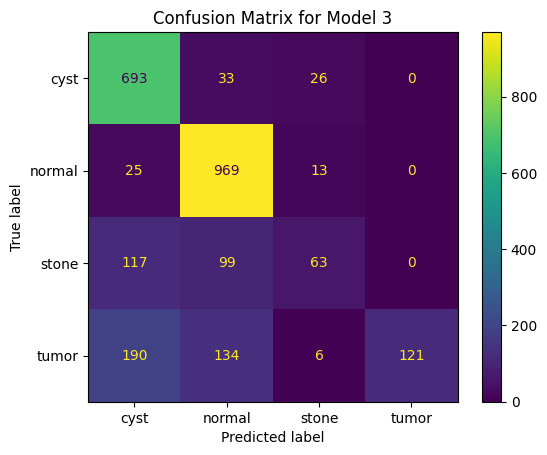

In [44]:
fig, ax = plt.subplots()

ConfusionMatrixDisplay.from_predictions(val_y_true, val_y_pred3, display_labels=['cyst', 'normal', 'stone', 'tumor'], ax=ax)
ax.set_title('Confusion Matrix for Model 3');

In [50]:
report_scores(val_y_true, val_y_pred3, 'Model 3')

Model 3

Accuracy score: 0.7416633186018481

Classification report:
              precision    recall  f1-score   support

        cyst      0.676     0.922     0.780       752
      normal      0.785     0.962     0.864      1007
       stone      0.583     0.226     0.326       279
       tumor      1.000     0.268     0.423       451

    accuracy                          0.742      2489
   macro avg      0.761     0.594     0.598      2489
weighted avg      0.768     0.742     0.699      2489



## Model 4: Variable Learning Rate

In [36]:
mod4 = keras.models.load_model('model_4_checkpoints/01.keras')

In [ ]:
preds4 = mod4.predict(val_df)

 5/20 ━━━━━━━━━━━━━━━━━━━━ 2:29 10s/step

In [ ]:
val_y_pred4 = np.argmax(preds4, axis=1)

NameError: name 'val_y_pred4' is not defined

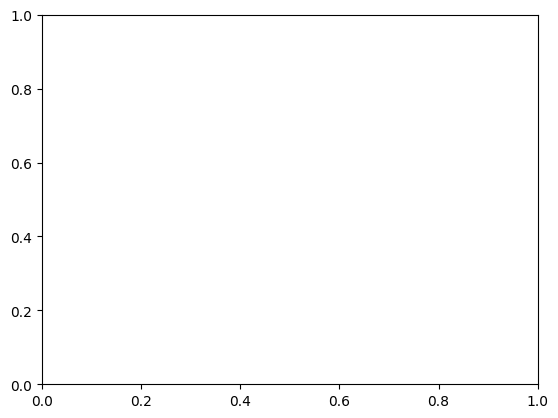

In [46]:
fig, ax = plt.subplots()

ConfusionMatrixDisplay.from_predictions(val_y_true, val_y_pred4, display_labels=['cyst', 'normal', 'stone', 'tumor'], ax=ax)
ax.set_title('Confusion Matrix for Model 4');

# fig.savefig('../images/confusionmatrix_model4.png')

In [ ]:
report_scores(val_y_true, val_y_pred4, 'Model 4')